In [1]:
from finny import csv_parse
transactions = csv_parse.read_transactions_from_folder("../ex")

In [2]:
from finny import cleaner
clean_txs = cleaner.clean_transactions(transactions)
clean_txs[4]

{'date': datetime.datetime(2020, 1, 6, 0, 0),
 'ref_num': '24164070005091017105650',
 'description': 'target 00025841',
 'address': 'sunnyvale ca',
 'amount': -21.1,
 'type': 'debit'}

In [3]:
from finny import enhance
enhanced_txs = enhance.enhance_transactions(clean_txs)

[x for x in enhanced_txs if not x.get('merchant')]

[]

In [4]:
import pandas as pd

tx_df = pd.DataFrame(enhanced_txs) 

<BarContainer object of 97 artists>

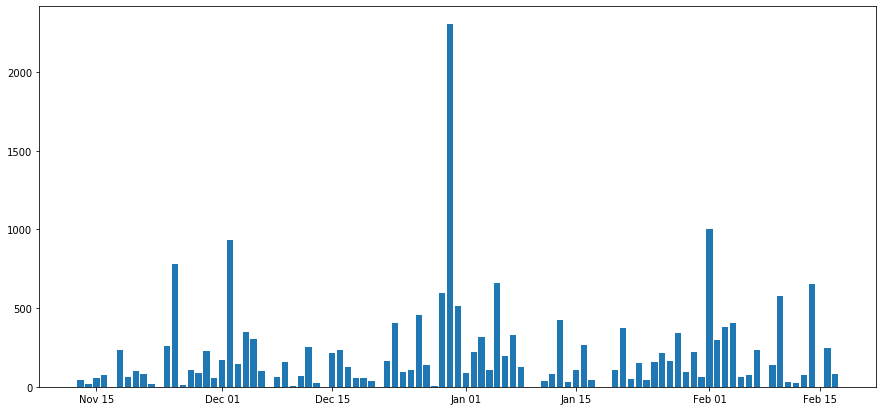

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = tx_df.set_index('date')
fig, ax = plt.subplots(figsize=(15,7))

daily_spendings_df = df[df['type']=='debit'].resample('D').sum().transform(abs)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
daily_spendings_df
ax.bar(daily_spendings_df.index, daily_spendings_df['amount'])

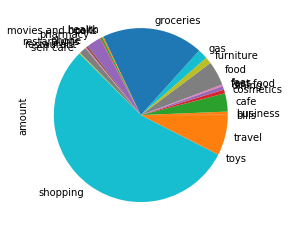

In [6]:
df[df['type']=='debit'].groupby(['category'])['amount'].agg('sum').map(abs).plot(kind='pie')

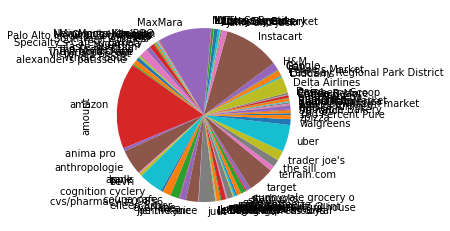

In [7]:
df[df['type']=='debit'].groupby(['merchant'])['amount'].agg('sum').map(abs).plot(kind='pie')

In [8]:
df[df['type']=='debit'].groupby(['category'])['amount'].agg('sum').map(abs).sort_values(ascending=False).to_frame()

,amount
category,
shopping,10759.44
groceries,3679.82
travel,1466.42
food,880.90
cafe,663.37
pharmacy,511.51
gas,363.24
restaurant,252.33
furniture,237.95


In [9]:
df[df['type']=='debit'].groupby(['merchant'])['amount'].agg('sum').map(abs).sort_values(ascending=False).to_frame()

,amount
merchant,
amazon,3129.50
Instacart,2043.53
MaxMara,1923.96
uber,982.99
target,969.51
...,...
learning express toys,7.53
masa sushi,6.00
Beard Papa,5.90


In [10]:
df[df['merchant']=='amazon'].sort_values(by='amount', ascending=True)

,ref_num,description,address,amount,type,merchant,category,tags,merchant_location,point_of_sale,tx_date,bank_category,bank_tx_type,order_number
date,,,,,,,,,,,,,,
2020-01-05,NaN,amazon.com*zh34e19h3,NaN,-218.39,debit,amazon,shopping,[shopping],NaN,NaN,2020-01-04,shopping,sale,zh34e19h3
2020-01-28,NaN,amzn mktp us*398e476y3,NaN,-212.32,debit,amazon,shopping,[shopping],NaN,NaN,2020-01-27,shopping,sale,398e476y3
2020-01-30,NaN,amazon.com*rr5do1k33,NaN,-134.74,debit,amazon,shopping,[shopping],NaN,NaN,2020-01-29,shopping,sale,rr5do1k33
2019-12-02,NaN,amazon.com*z56217uu3,NaN,-109.20,debit,amazon,shopping,[shopping],NaN,NaN,2019-12-02,shopping,sale,z56217uu3
2019-12-01,NaN,amazon.com*0w5yl08g3,NaN,-106.16,debit,amazon,shopping,[shopping],NaN,NaN,2019-11-30,shopping,sale,0w5yl08g3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-09,NaN,amzn mktp us,NaN,14.06,credit,amazon,shopping,[shopping],NaN,NaN,2020-01-09,shopping,return,NaN
2020-02-14,NaN,amazon.com,NaN,15.25,credit,amazon,shopping,[shopping],NaN,NaN,2020-02-13,shopping,return,NaN
2019-12-10,NaN,amzn mktp us,NaN,35.92,credit,amazon,shopping,[shopping],NaN,NaN,2019-12-10,shopping,return,NaN
